In [557]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure, plot
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import requests

pd.set_option('display.max_columns', 200)


In [229]:
airports = requests.get("https://www.flightradar24.com/_json/airports.php", headers= {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36 OPR/51.0.2830.55"
    }).json()["rows"]
airports = pd.DataFrame(airports)


In [239]:
airlines = requests.get("https://www.flightradar24.com/_json/airlines.php", headers= {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36 OPR/51.0.2830.55"
    }).json()["rows"]
airlines = pd.DataFrame(airlines)

In [3]:
new_revenue_05 = pd.read_excel("/Users/igor/Downloads/Шереметьево  2/Файлы с дополненными данными /05.2022_Выручка.xlsx")
new_revenue_06 = pd.read_excel("/Users/igor/Downloads/Шереметьево  2/Файлы с дополненными данными /06.2022_Выручка.xlsx")

In [4]:
pax_traffic_05 = pd.read_excel("/Users/igor/Downloads/Шереметьево  2/05.2022_Пассажиропоток.xlsx")
pax_traffic_06 = pd.read_excel("/Users/igor/Downloads/Шереметьево  2/06.2022_Пассажиропоток.xlsx")

pax_traffic_05 = pax_traffic_05.rename(columns={"Дата рейса": "date",
                       "Рейс": "flight",
                       "Вход в чистую зону": "clean_zone_time",
                       "Выход на рейс": "boarding_time",
                       "Терминал": "terminal",
                       "Авиакомпания": "airline",
                       "Направление куда летит": "destination"
                      })

pax_traffic_06 = pax_traffic_06.rename(columns={"Дата рейса": "date",
                       "Рейс": "flight",
                       "Вход в чистую зону": "clean_zone_time",
                       "Выход на рейс": "boarding_time",
                       "Терминал": "terminal",
                       "Авиакомпания": "airline",
                       "Направление куда летит": "destination"
                      })

In [130]:
flights = pd.read_excel("/Users/igor/Downloads/Шереметьево  2/Расписание рейсов 05-06.2022.xlsx")

In [374]:
pax_traffic_05[pax_traffic_05["flight_number"] == '1460']

,date,flight,clean_zone_time,boarding_time,terminal,airline,destination,flight_airline,flight_number,delta,name,iata,country,lat,lon,distance
8295,2022-05-05,SU 1460,2022-05-04 23:11:20,2022-05-05 08:50:00,B,SU,OVB,SU,1460,34720.0,Novosibirsk Tolmachevo Airport,OVB,Russia,55.012619,82.65065,2809.890032


In [376]:
new_revenue_05

,TimeThirty,DAT,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm
0,2022-05-01 00:00:00.000,2022-05-01,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,755 448
1,2022-05-04 13:30:00.000,2022-05-04,Торговая точка 2373,3114,Общепит,B,Общедоступная зона-вылет,46 800
2,2022-05-05 18:00:00.000,2022-05-05,Торговая точка 8998,9887,Торговля,B,Чистая зона ВВЛ-вылет,160 160
3,2022-05-25 22:00:00.000,2022-05-25,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,248 960
4,2022-05-10 00:30:00.000,2022-05-10,Торговая точка 8998,9887,Торговля,B,Чистая зона ВВЛ-вылет,117 600
...,...,...,...,...,...,...,...,...
11835,2022-05-12 19:00:00.000,2022-05-12,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,72 320
11836,2022-05-24 10:00:00.000,2022-05-24,Торговая точка 3726,5944,Общепит,B,Чистая зона ВВЛ-вылет,396 000
11837,2022-05-12 08:00:00.000,2022-05-12,Торговая точка 3726,5944,Общепит,B,Чистая зона ВВЛ-вылет,300 000
11838,2022-05-28 21:30:00.000,2022-05-28,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,444 800


In [131]:
new_flights = pd.read_excel("/Users/igor/Downloads/Шереметьево  2/Файлы с дополненными данными /Расписание рейсов 05-06.2022 (1).xlsx")

In [132]:
revenue_05 = pd.read_excel("/Users/igor/Downloads/Шереметьево  2/05.2022_Выручка.xlsx")
revenue_06 = pd.read_excel("/Users/igor/Downloads/Шереметьево  2/06.2022_Выручка.xlsx")

revenue_05 = revenue_05.rename(columns={"Дата": "date", 
                           "Дата с разбивкой по 30 минут": "timeThirty",
                           "Прибыль на момент времени": "revenue",
                           "Точка продаж": "point",
                          })
revenue_06 = revenue_06.rename(columns={"Дата": "date", 
                           "Дата с разбивкой по 30 минут": "timeThirty",
                           "Прибыль на момент времени": "revenue",
                           "Точка продаж": "point",
                          })

revenue_05['revenue'] = revenue_05['revenue'].apply(lambda x: str(x).replace(u'\xa0', u''))
revenue_05['revenue'] = revenue_05['revenue'].apply(lambda x: str(x).replace(u',', u'.'))
revenue_05["revenue"] = revenue_05["revenue"].astype(float)

revenue_06['revenue'] = revenue_06['revenue'].apply(lambda x: str(x).replace(u'\xa0', u''))
revenue_06['revenue'] = revenue_06['revenue'].apply(lambda x: str(x).replace(u',', u'.'))
revenue_06["revenue"] = revenue_06["revenue"].astype(float)

revenue_05 = revenue_05.drop(columns="date")
revenue_06 = revenue_06.drop(columns="date")

In [283]:
revenue_05 = pd.read_excel("/Users/igor/Downloads/Шереметьево  2/05.2022_Выручка.xlsx")
revenue_05 = revenue_05.rename(columns={"Дата": "date", 
                           "Дата с разбивкой по 30 минут": "timeThirty",
                           "Прибыль на момент времени": "revenue",
                           "Точка продаж": "point",
                          })
revenue_05['revenue'] = revenue_05['revenue'].apply(lambda x: str(x).replace(u'\xa0', u''))
revenue_05['revenue'] = revenue_05['revenue'].apply(lambda x: str(x).replace(u',', u'.'))
revenue_05["revenue"] = revenue_05["revenue"].astype(float)
revenue_05 = revenue_05.drop(columns="date")

In [289]:
pax_traffic_05 = pd.read_excel("/Users/igor/Downloads/Шереметьево  2/05.2022_Пассажиропоток.xlsx")

pax_traffic_05 = pax_traffic_05.rename(columns={"Дата рейса": "date",
                       "Рейс": "flight",
                       "Вход в чистую зону": "clean_zone_time",
                       "Выход на рейс": "boarding_time",
                       "Терминал": "terminal",
                       "Авиакомпания": "airline",
                       "Направление куда летит": "destination"
                      })

## Feature engenering

In [290]:
from geopy.distance import geodesic as GD 

def calc_distance(lat, lon):
    SVO_airport = (55.972641, 37.414581)
    dest_airport = (lat, lon) 
    return GD(SVO_airport, dest_airport).km

In [292]:
mean_revenue = revenue_05[["point", "revenue"]].groupby(["point"]).mean().sort_values(by="revenue").reset_index().rename(columns={"revenue": "mean_revenue"})


In [291]:
pax_traffic_05 = pax_traffic_05.replace({"MZR KBL": "KBL"})
pax_traffic_05["flight_airline"] = pax_traffic_05["flight"].str.split(" ").str[0]
pax_traffic_05["flight_number"] = pax_traffic_05["flight"].str.split(" ").str[1]
pax_traffic_05["boarding_time"] = pd.to_datetime(pax_traffic_05["boarding_time"])
pax_traffic_05["clean_zone_time"] = pd.to_datetime(pax_traffic_05["clean_zone_time"])
pax_traffic_05["delta"] = pax_traffic_05["boarding_time"] - pax_traffic_05["clean_zone_time"]
pax_traffic_05["delta"] = pax_traffic_05["delta"].dt.total_seconds()
pax_traffic_05 = pax_traffic_05.merge(airports[["name", "iata", "country", "lat", "lon"]], how='left', left_on='destination', right_on='iata')
pax_traffic_05 = pax_traffic_05.rename({"name": "airport_name"})
pax_traffic_05.merge(airlines[["Name", "Code"]], how='left', left_on='airline', right_on='Code')
pax_traffic_05 = pax_traffic_05.rename({"Name": "airline_name"})
pax_traffic_05["distance"] = pax_traffic_05.apply(lambda x: calc_distance(x['lat'], x['lon']), axis=1)


In [293]:
revenue_05["timeThirty"] = pd.to_datetime(revenue_05["timeThirty"])
revenue_05["day_of_week"] = revenue_05["timeThirty"].dt.dayofweek
revenue_05["day_of_year"] = revenue_05["timeThirty"].dt.dayofyear
revenue_05["day"] = revenue_05["timeThirty"].dt.day
revenue_05["month"] = revenue_05["timeThirty"].dt.month
revenue_05["hour"] = revenue_05["timeThirty"].dt.hour
revenue_05["minutes"] = revenue_05["timeThirty"].dt.minute
revenue_05 = revenue_05.merge(mean_revenue, how='left', left_on='point', right_on='point')

revenue_05["is_weekend"] = np.logical_or(False, revenue_05["day_of_week"] == 6)
revenue_05["is_weekend"] = np.logical_or(revenue_05["is_weekend"], revenue_05["day_of_week"] == 7)
revenue_05["is_weekend"] = np.logical_or(revenue_05["is_weekend"], revenue_05["day"] == 2)
revenue_05["is_weekend"] = np.logical_or(revenue_05["is_weekend"], revenue_05["day"] == 3)
revenue_05["is_weekend"] = np.logical_or(revenue_05["is_weekend"], revenue_05["day"] == 9)
revenue_05["is_weekend"] = np.logical_or(revenue_05["is_weekend"], revenue_05["day"] == 10)
revenue_05["is_weekend"] = revenue_05["is_weekend"].astype(int)

In [383]:
df["day_of_week"] = df["datetime"].dt.dayofweek
df["is_weekend"] = np.logical_or(df["day_of_week"] == 6, revenue_05["day_of_week"] == 7)

In [300]:
def count_clients(timeThirty):
    return pax_traffic_05[(pax_traffic_05["clean_zone_time"] <= timeThirty) & 
                          (pax_traffic_05["boarding_time"] >= timeThirty)
                         ].shape[0]

def count_B_clients(timeThirty):
    return pax_traffic_05[(pax_traffic_05["clean_zone_time"] <= timeThirty) & 
                          (pax_traffic_05["boarding_time"] >= timeThirty) & 
                          (pax_traffic_05["terminal"] == 'B')
                         ].shape[0]

def count_C_clients(timeThirty):
    return pax_traffic_05[(pax_traffic_05["clean_zone_time"] <= timeThirty) & 
                          (pax_traffic_05["boarding_time"] >= timeThirty) & 
                          (pax_traffic_05["terminal"] == 'C')
                         ].shape[0]

def count_SU_clients(timeThirty):
    return pax_traffic_05[(pax_traffic_05["clean_zone_time"] <= timeThirty) & 
                          (pax_traffic_05["boarding_time"] >= timeThirty) & 
                          (pax_traffic_05["airline"] == 'SU')
                         ].shape[0]

def count_SU_clients(timeThirty):
    return pax_traffic_05[(pax_traffic_05["clean_zone_time"] <= timeThirty) & 
                          (pax_traffic_05["boarding_time"] >= timeThirty) & 
                          (pax_traffic_05["airline"] == 'SU')
                         ].shape[0]

def count_domestic_clients(timeThirty):
    return pax_traffic_05[(pax_traffic_05["clean_zone_time"] <= timeThirty) & 
                          (pax_traffic_05["boarding_time"] >= timeThirty) & 
                          (pax_traffic_05["country"] == 'Russia')
                         ].shape[0]

def count_international_clients(timeThirty):
    return pax_traffic_05[(pax_traffic_05["clean_zone_time"] <= timeThirty) & 
                          (pax_traffic_05["boarding_time"] >= timeThirty) & 
                          (pax_traffic_05["country"] != 'Russia')
                         ].shape[0]

def calc_avg_distance(timeThirty):
    return pax_traffic_05[(pax_traffic_05["clean_zone_time"] <= timeThirty) & 
                          (pax_traffic_05["boarding_time"] >= timeThirty)]["distance"].mean()

def calc_avg_waiting_time(timeThirty):
    return pax_traffic_05[(pax_traffic_05["clean_zone_time"] <= timeThirty) & 
                          (pax_traffic_05["boarding_time"] >= timeThirty)]["delta"].mean()

In [301]:
revenue_05["count_clients"] = revenue_05['timeThirty'].apply(lambda x: count_clients(x))
revenue_05["count_B_clients"] = revenue_05['timeThirty'].apply(lambda x: count_B_clients(x))
revenue_05["count_C_clients"] = revenue_05['timeThirty'].apply(lambda x: count_C_clients(x))
revenue_05["count_SU_clients"] = revenue_05['timeThirty'].apply(lambda x: count_SU_clients(x))

In [302]:
revenue_05["count_domestic_clients"] = revenue_05['timeThirty'].apply(lambda x: count_domestic_clients(x))
revenue_05["count_international_clients"] = revenue_05['timeThirty'].apply(lambda x: count_international_clients(x))
revenue_05["calc_avg_distance"] = revenue_05['timeThirty'].apply(lambda x: calc_avg_distance(x))
revenue_05["calc_avg_waiting_time"] = revenue_05['timeThirty'].apply(lambda x: calc_avg_waiting_time(x))

In [354]:
pax_traffic_05.head()

,date,flight,clean_zone_time,boarding_time,terminal,airline,destination,flight_airline,flight_number,delta,name,iata,country,lat,lon,distance
0,2022-05-01,5N 237,2022-04-30 21:46:20,2022-05-01 00:21:00,B,5N,OVB,5N,237,9280.0,Novosibirsk Tolmachevo Airport,OVB,Russia,55.012619,82.65065,2809.890032
1,2022-05-01,5N 237,2022-04-30 21:46:47,2022-05-01 00:21:00,B,5N,OVB,5N,237,9253.0,Novosibirsk Tolmachevo Airport,OVB,Russia,55.012619,82.65065,2809.890032
2,2022-05-01,5N 237,2022-04-30 21:47:47,2022-05-01 00:21:00,B,5N,OVB,5N,237,9193.0,Novosibirsk Tolmachevo Airport,OVB,Russia,55.012619,82.65065,2809.890032
3,2022-05-01,5N 237,2022-04-30 21:48:20,2022-05-01 00:21:00,B,5N,OVB,5N,237,9160.0,Novosibirsk Tolmachevo Airport,OVB,Russia,55.012619,82.65065,2809.890032
4,2022-05-01,5N 237,2022-04-30 21:49:12,2022-05-01 00:21:00,B,5N,OVB,5N,237,9108.0,Novosibirsk Tolmachevo Airport,OVB,Russia,55.012619,82.65065,2809.890032


In [355]:
revenue_05.head()

,timeThirty,revenue,point,day_of_week,day_of_year,day,month,hour,minutes,mean_revenue,is_weekend,count_clients,count_B_clients,count_C_clients,count_SU_clients,count_domestic_clients,count_international_clients,calc_avg_distance,calc_avg_waiting_time
0,2022-04-30 23:30:00,352.5,Точка продаж 23,5,120,30,4,23,30,5485.718908,0,1656,1349,307,1352,1349,307,2324.552344,9724.966787
1,2022-05-01 00:00:00,981.0,Точка продаж 12,6,121,1,5,0,0,3826.886135,1,2158,1707,451,1723,1707,451,2305.786681,9179.351251
2,2022-05-01 00:00:00,1574.5,Точка продаж 3,6,121,1,5,0,0,4230.531963,1,2158,1707,451,1723,1707,451,2305.786681,9179.351251
3,2022-05-01 00:00:00,1963.5,Точка продаж 28,6,121,1,5,0,0,5976.448442,1,2158,1707,451,1723,1707,451,2305.786681,9179.351251
4,2022-05-01 00:00:00,1649.5,Точка продаж 22,6,121,1,5,0,0,2143.475573,1,2158,1707,451,1723,1707,451,2305.786681,9179.351251


In [356]:
r = revenue_05.copy(True)
r["count_clients2"] = pax_traffic_05.merge(pax_traffic_05[(pax_traffic_05["clean_zone_time"] <= r["timeThirty"]) & 
                          (pax_traffic_05["boarding_time"] >= r["timeThirty"])
                         ].shape[0], how='left', 
                                           #left_on='destination', right_on='iata'
                                          )

ValueError: Can only compare identically-labeled Series objects

## Fit

In [305]:
revenue_05

,timeThirty,revenue,point,day_of_week,day_of_year,day,month,hour,minutes,mean_revenue,is_weekend,count_clients,count_B_clients,count_C_clients,count_SU_clients,count_domestic_clients,count_international_clients,calc_avg_distance,calc_avg_waiting_time
0,2022-04-30 23:30:00,352.5,Точка продаж 23,5,120,30,4,23,30,5485.718908,0,1656,1349,307,1352,1349,307,2324.552344,9724.966787
1,2022-05-01 00:00:00,981.0,Точка продаж 12,6,121,1,5,0,0,3826.886135,1,2158,1707,451,1723,1707,451,2305.786681,9179.351251
2,2022-05-01 00:00:00,1574.5,Точка продаж 3,6,121,1,5,0,0,4230.531963,1,2158,1707,451,1723,1707,451,2305.786681,9179.351251
3,2022-05-01 00:00:00,1963.5,Точка продаж 28,6,121,1,5,0,0,5976.448442,1,2158,1707,451,1723,1707,451,2305.786681,9179.351251
4,2022-05-01 00:00:00,1649.5,Точка продаж 22,6,121,1,5,0,0,2143.475573,1,2158,1707,451,1723,1707,451,2305.786681,9179.351251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27351,2022-06-01 00:00:00,1155.0,Точка продаж 11,2,152,1,6,0,0,1291.907238,0,0,0,0,0,0,0,NaN,NaN
27352,2022-06-01 00:00:00,532.0,Точка продаж 10,2,152,1,6,0,0,4436.209654,0,0,0,0,0,0,0,NaN,NaN
27353,2022-06-01 00:00:00,453.0,Точка продаж 12,2,152,1,6,0,0,3826.886135,0,0,0,0,0,0,0,NaN,NaN
27354,2022-06-01 00:00:00,1215.0,Точка продаж 16,2,152,1,6,0,0,16566.777030,0,0,0,0,0,0,0,NaN,NaN


In [308]:
revenue_05.columns

Index(['timeThirty', 'revenue', 'point', 'day_of_week', 'day_of_year', 'day',
       'month', 'hour', 'minutes', 'mean_revenue', 'is_weekend',
       'count_clients', 'count_B_clients', 'count_C_clients',
       'count_SU_clients', 'count_domestic_clients',
       'count_international_clients', 'calc_avg_distance',
       'calc_avg_waiting_time'],
      dtype='object')

In [335]:
Xy = revenue_05[(revenue_05["timeThirty"] >= '2022-05-01 12:00:00') & 
                (revenue_05["timeThirty"] <= '2022-05-31 12:00:00')]
X = Xy.drop(columns=['timeThirty', 'revenue', 'point', 'revenue',
                     
                    ])
y = Xy['revenue']

In [336]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [337]:
from catboost import CatBoostRegressor

clf = CatBoostRegressor(random_state=42, eval_metric="RMSE", iterations=100)
clf.fit(X_train, y_train,
        # cat_features=["point"],
        eval_set=(X_test, y_test),
        plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.328051
0:	learn: 5170.0302475	test: 4967.8442730	best: 4967.8442730 (0)	total: 4.84ms	remaining: 480ms
1:	learn: 4710.9994161	test: 4499.9878855	best: 4499.9878855 (1)	total: 7.51ms	remaining: 368ms
2:	learn: 4420.9876901	test: 4231.2037126	best: 4231.2037126 (2)	total: 9.97ms	remaining: 322ms
3:	learn: 4262.0577149	test: 4071.0361298	best: 4071.0361298 (3)	total: 12.3ms	remaining: 295ms
4:	learn: 4162.6550958	test: 3981.8342381	best: 3981.8342381 (4)	total: 14.6ms	remaining: 277ms
5:	learn: 4063.3003905	test: 3922.2736729	best: 3922.2736729 (5)	total: 17ms	remaining: 266ms
6:	learn: 4020.6615669	test: 3907.4716674	best: 3907.4716674 (6)	total: 19.1ms	remaining: 254ms
7:	learn: 3981.5709857	test: 3879.0701737	best: 3879.0701737 (7)	total: 21.3ms	remaining: 245ms
8:	learn: 3961.6504905	test: 3862.1638375	best: 3862.1638375 (8)	total: 23.5ms	remaining: 237ms
9:	learn: 3923.4194243	test: 3841.3139091	best: 3841.3139091 (9)	total: 25.8ms	remaining: 232ms
10:	learn: 3

84:	learn: 3241.3899207	test: 3663.0578655	best: 3656.2924821 (65)	total: 182ms	remaining: 32.1ms
85:	learn: 3239.7435266	test: 3664.7586491	best: 3656.2924821 (65)	total: 184ms	remaining: 30ms
86:	learn: 3237.9236463	test: 3664.8866791	best: 3656.2924821 (65)	total: 186ms	remaining: 27.8ms
87:	learn: 3234.1396086	test: 3666.8482546	best: 3656.2924821 (65)	total: 188ms	remaining: 25.6ms
88:	learn: 3232.2250544	test: 3667.1839483	best: 3656.2924821 (65)	total: 190ms	remaining: 23.5ms
89:	learn: 3230.3467435	test: 3666.9251720	best: 3656.2924821 (65)	total: 192ms	remaining: 21.3ms
90:	learn: 3227.3522700	test: 3665.1729608	best: 3656.2924821 (65)	total: 194ms	remaining: 19.2ms
91:	learn: 3223.1210433	test: 3667.6393101	best: 3656.2924821 (65)	total: 196ms	remaining: 17ms
92:	learn: 3218.0627676	test: 3668.2997330	best: 3656.2924821 (65)	total: 198ms	remaining: 14.9ms
93:	learn: 3216.1863731	test: 3667.4941019	best: 3656.2924821 (65)	total: 200ms	remaining: 12.7ms
94:	learn: 3215.2745285	

In [338]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_predicted = clf.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted, squared=False)
mae = mean_absolute_error(y_test, y_predicted)
rmse, mae

(3656.2924788758774, 2045.0119066932261)

In [339]:
def plot_feature_importance(importance,names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df = fi_df[:20]
    
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

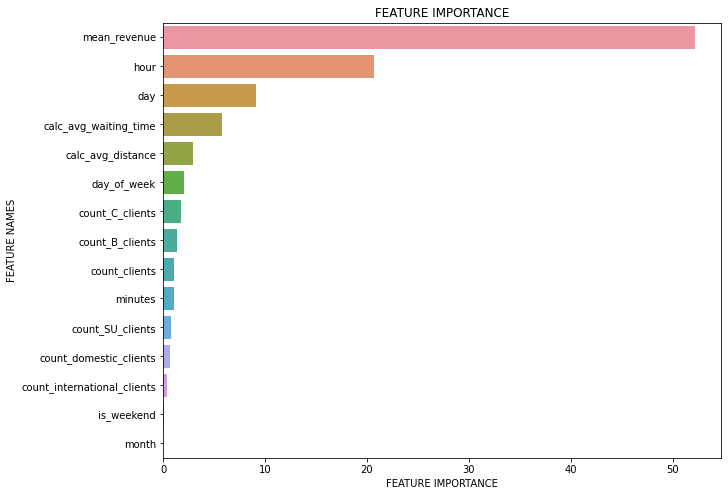

In [340]:
plot_feature_importance(clf.get_feature_importance(),
                        X.columns)

## Research

In [109]:
t = pax_traffic_05.copy(True)
t["delta"] = t["boarding_time"] - t["clean_zone_time"]
t["delta"] = t.delta.dt.total_seconds()
t

,date,flight,clean_zone_time,boarding_time,terminal,airline,destination,delta
0,2022-05-01,5N 237,2022-04-30 21:46:20,2022-05-01 00:21:00,B,5N,OVB,9280.0
1,2022-05-01,5N 237,2022-04-30 21:46:47,2022-05-01 00:21:00,B,5N,OVB,9253.0
2,2022-05-01,5N 237,2022-04-30 21:47:47,2022-05-01 00:21:00,B,5N,OVB,9193.0
3,2022-05-01,5N 237,2022-04-30 21:48:20,2022-05-01 00:21:00,B,5N,OVB,9160.0
4,2022-05-01,5N 237,2022-04-30 21:49:12,2022-05-01 00:21:00,B,5N,OVB,9108.0
...,...,...,...,...,...,...,...,...
53477,2022-05-31,XC 8304,2022-05-30 23:56:57,2022-05-31 03:08:00,C,XC,AYT,11463.0
53478,2022-05-31,XC 8304,2022-05-30 23:57:07,2022-05-31 03:08:00,C,XC,AYT,11453.0
53479,2022-05-31,XC 8304,2022-05-30 23:57:57,2022-05-31 03:08:00,C,XC,AYT,11403.0
53480,2022-05-31,XC 8304,2022-05-30 23:58:24,2022-05-31 03:08:00,C,XC,AYT,11376.0


In [115]:
t2 = t[["date", "delta"]].groupby('date').mean().reset_index()

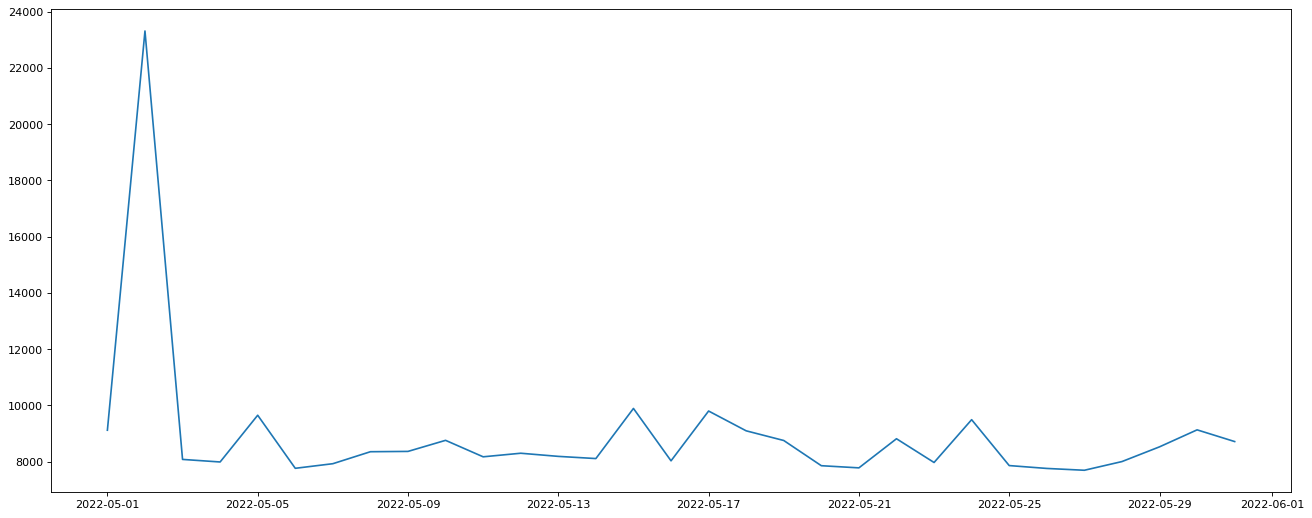

In [116]:
figure(figsize=(20, 8), dpi=80)
plot(t2["date"], t2["delta"]);

In [68]:
status = flights["AIRLINE"].value_counts()
status = pd.DataFrame(status.reset_index())
status.columns=["airline", "count"]
status["percent"]=round(status["count"]/status["count"].sum() * 100, 2)
status["percent"]=status["percent"].astype(str)
status["percent"]=status["percent"]+"%"
status.shape

(50, 3)

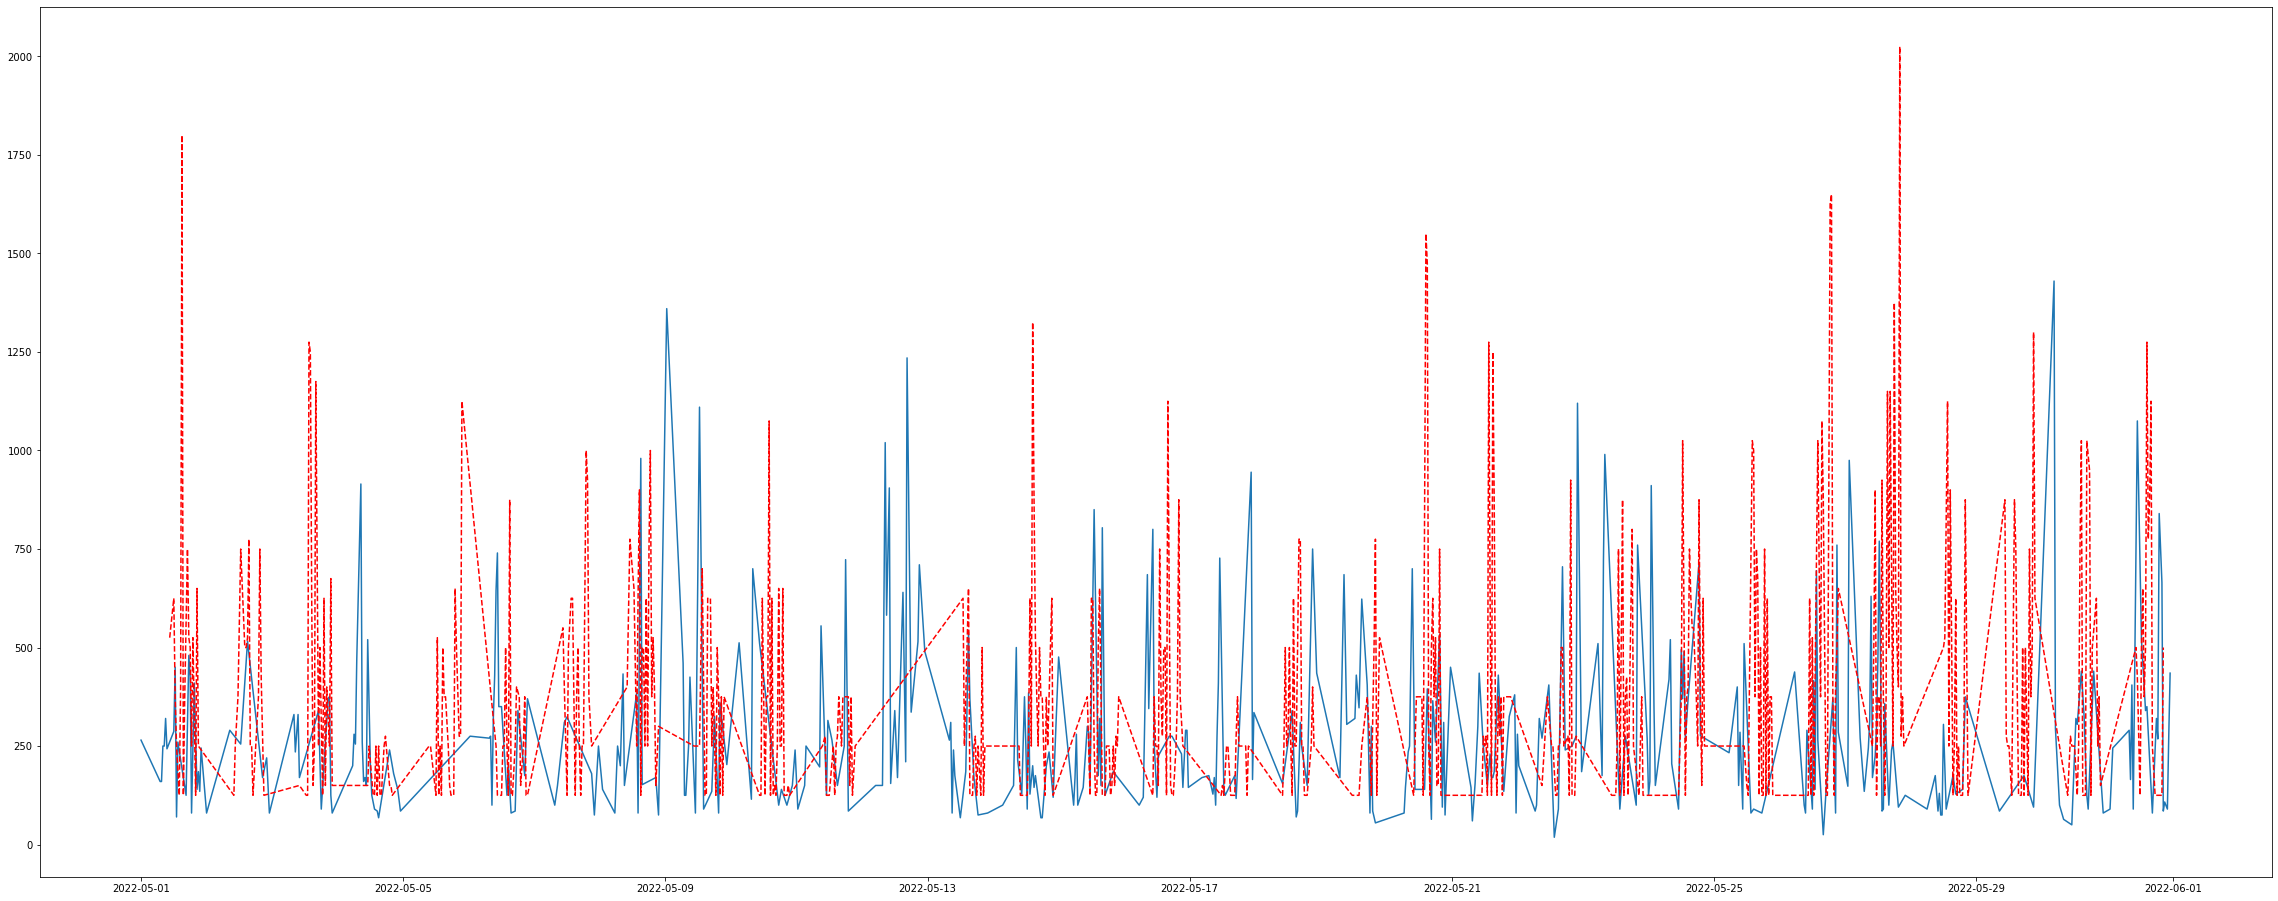

In [350]:
df = revenue_05[revenue_05["point"] == "Точка продаж 1"]

figure(figsize=(40, 16),)
plot(revenue_05[revenue_05["point"] == "Точка продаж 1"]["timeThirty"], 
     revenue_05[revenue_05["point"] == "Точка продаж 1"]["revenue"],
     '-',
     
     revenue_05[revenue_05["point"] == "Точка продаж 6"]["timeThirty"], 
     revenue_05[revenue_05["point"] == "Точка продаж 6"]["revenue"],
     'r--',
    );

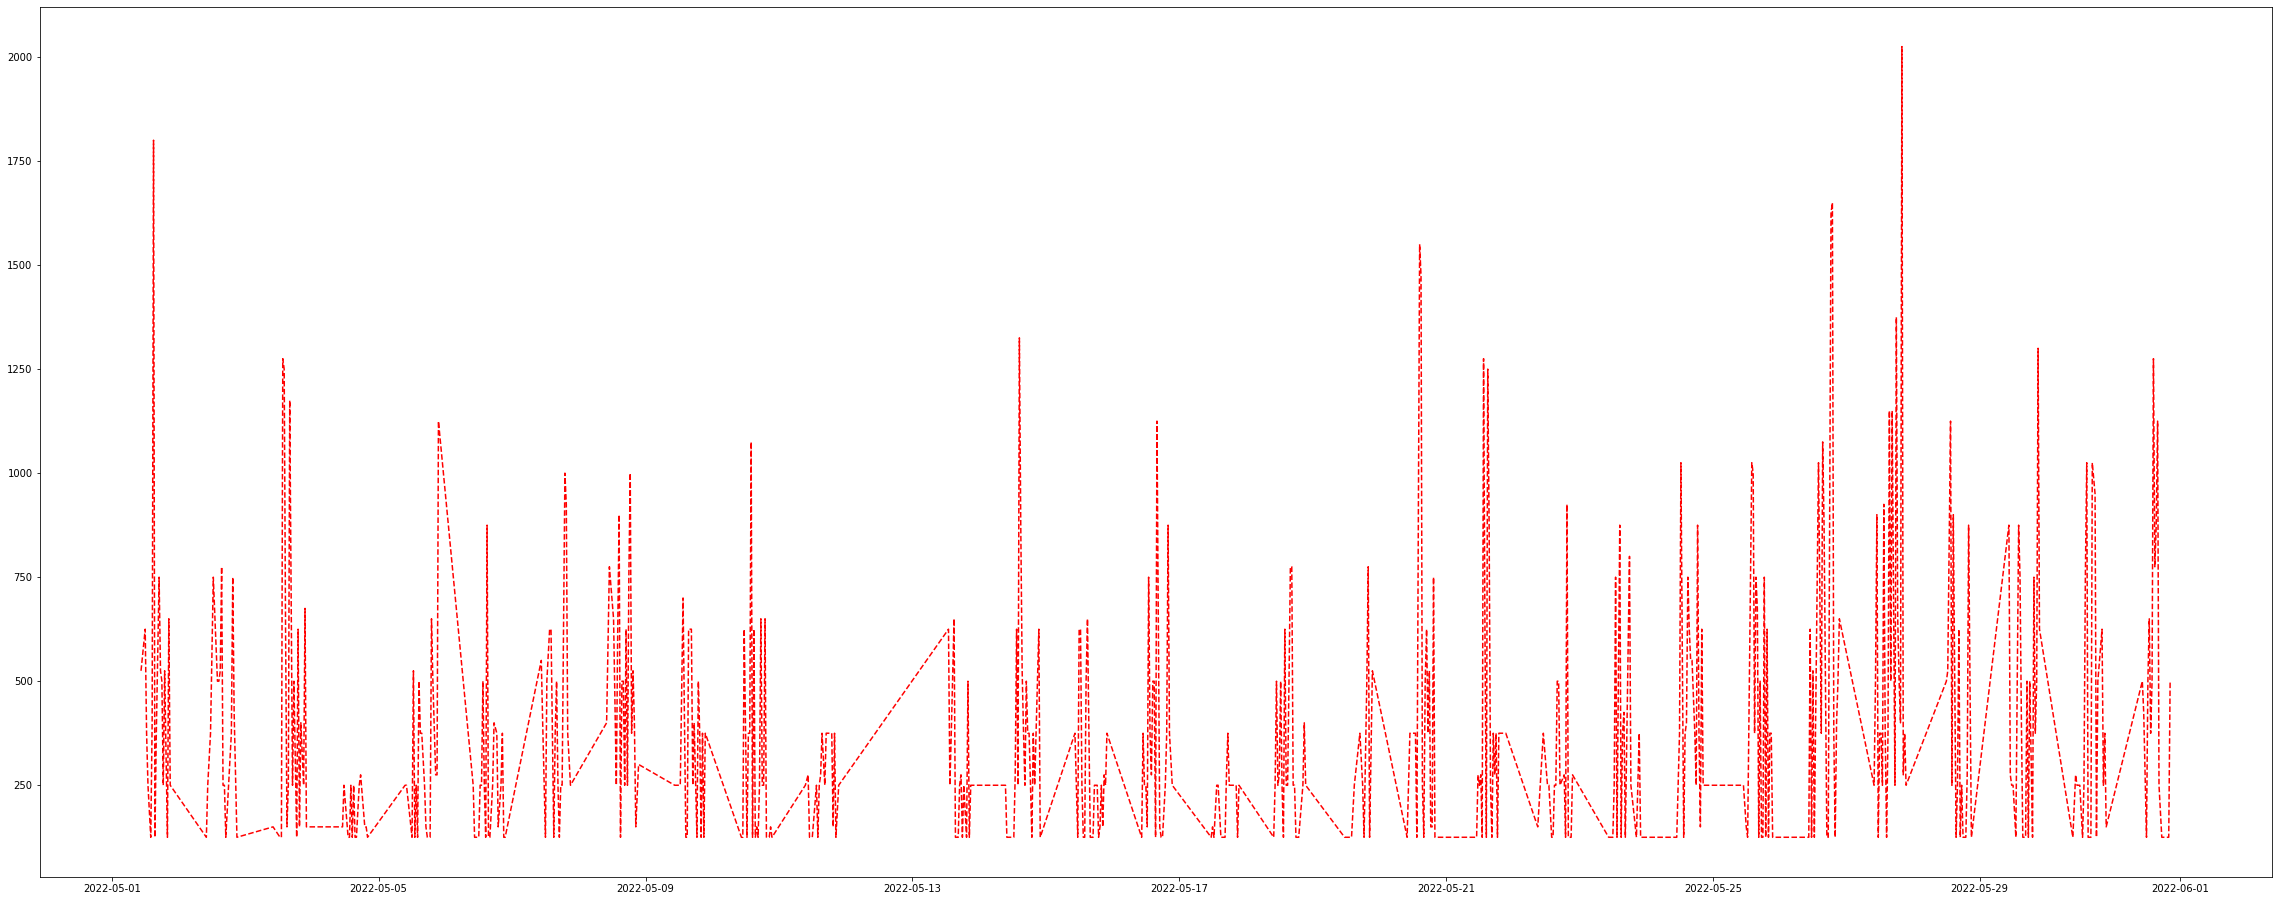

In [359]:
figure(figsize=(40, 16),)
plot(
     revenue_05[revenue_05["point"] == "Точка продаж 6"]["timeThirty"], 
     revenue_05[revenue_05["point"] == "Точка продаж 6"]["revenue"],
     'r--',
    );

In [646]:
revenue_05[revenue_05["point"] == "Точка продаж 1"]["timeThirty"], 
revenue_05[revenue_05["point"] == "Точка продаж 1"]["revenue"],

(8        265.0
 220      160.0
 231      160.0
 267      250.0
 274      250.0
          ...  
 27204     85.0
 27229    108.0
 27285     90.0
 27301    275.0
 27320    435.0
 Name: revenue, Length: 412, dtype: float64,)

In [648]:
qqq = revenue_05[revenue_05["point"] == "Точка продаж 1"]

In [650]:
# Simple Moving Average
def calc_smooth_1(arr, window_size=3):
    # Convert array of integers to pandas series
    numbers_series = pd.Series(arr)

    # Get the window of series
    # of observations of specified window size
    windows = numbers_series.rolling(window_size)

    # Create a series of moving
    # averages of each window
    moving_averages = windows.mean()

    # Convert pandas series back to list
    moving_averages_list = moving_averages.tolist()

    # Remove null entries from the list
    final_list = moving_averages_list[window_size - 1:]

    return final_list

In [647]:
# Pro version of Simple Moving Average
def calc_smooth_4(arr, window_size=3, d_param="dITT", first_value=7, is_round=True):
    numbers_series = pd.Series(arr)
    windows = numbers_series.rolling(window_size)
    moving_averages = windows.mean()
    moving_averages_list = moving_averages.tolist()
    
    first_15 = np.array([])
    for i in range(1, 15):
        q = np.append(np.array([first_value]), df1[d_param][:i]).mean()
        q = my_round(q) if is_round else q
        # print(i-1, q)
        first_15 = np.append(first_15, q)
    final_list = np.append(first_15, moving_averages_list[window_size - 1:])
    return final_list

In [654]:
calc_smooth_1(qqq["revenue"], 5)

[217.0,
 228.0,
 244.6,
 270.0,
 310.0,
 274.0,
 262.0,
 238.4,
 277.0,
 272.0,
 274.0,
 304.0,
 307.0,
 248.0,
 190.0,
 223.0,
 157.0,
 187.0,
 201.0,
 277.2,
 262.2,
 290.2,
 248.2,
 263.2,
 207.0,
 239.0,
 229.0,
 281.0,
 233.0,
 260.0,
 269.0,
 260.0,
 208.0,
 230.0,
 212.0,
 188.0,
 257.0,
 424.0,
 436.0,
 412.0,
 395.0,
 331.0,
 252.0,
 239.0,
 232.0,
 216.0,
 203.0,
 112.6,
 91.6,
 114.6,
 132.6,
 143.6,
 147.0,
 184.0,
 190.0,
 209.0,
 201.0,
 248.0,
 279.0,
 354.0,
 447.0,
 497.0,
 503.0,
 442.0,
 354.0,
 222.0,
 169.0,
 167.0,
 177.0,
 210.0,
 214.0,
 227.0,
 221.0,
 250.8,
 212.8,
 207.8,
 227.8,
 193.8,
 145.0,
 159.0,
 184.0,
 220.6,
 222.6,
 283.6,
 249.6,
 405.6,
 349.4,
 353.4,
 291.4,
 547.4,
 443.4,
 438.0,
 429.0,
 464.0,
 277.0,
 201.0,
 398.0,
 391.0,
 368.0,
 348.0,
 348.0,
 198.0,
 220.6,
 296.0,
 254.0,
 378.0,
 408.0,
 387.4,
 313.0,
 310.0,
 200.0,
 146.0,
 144.0,
 146.0,
 176.0,
 185.4,
 248.4,
 255.4,
 288.4,
 291.4,
 282.0,
 221.0,
 340.6,
 294.6,
 271.6,
 

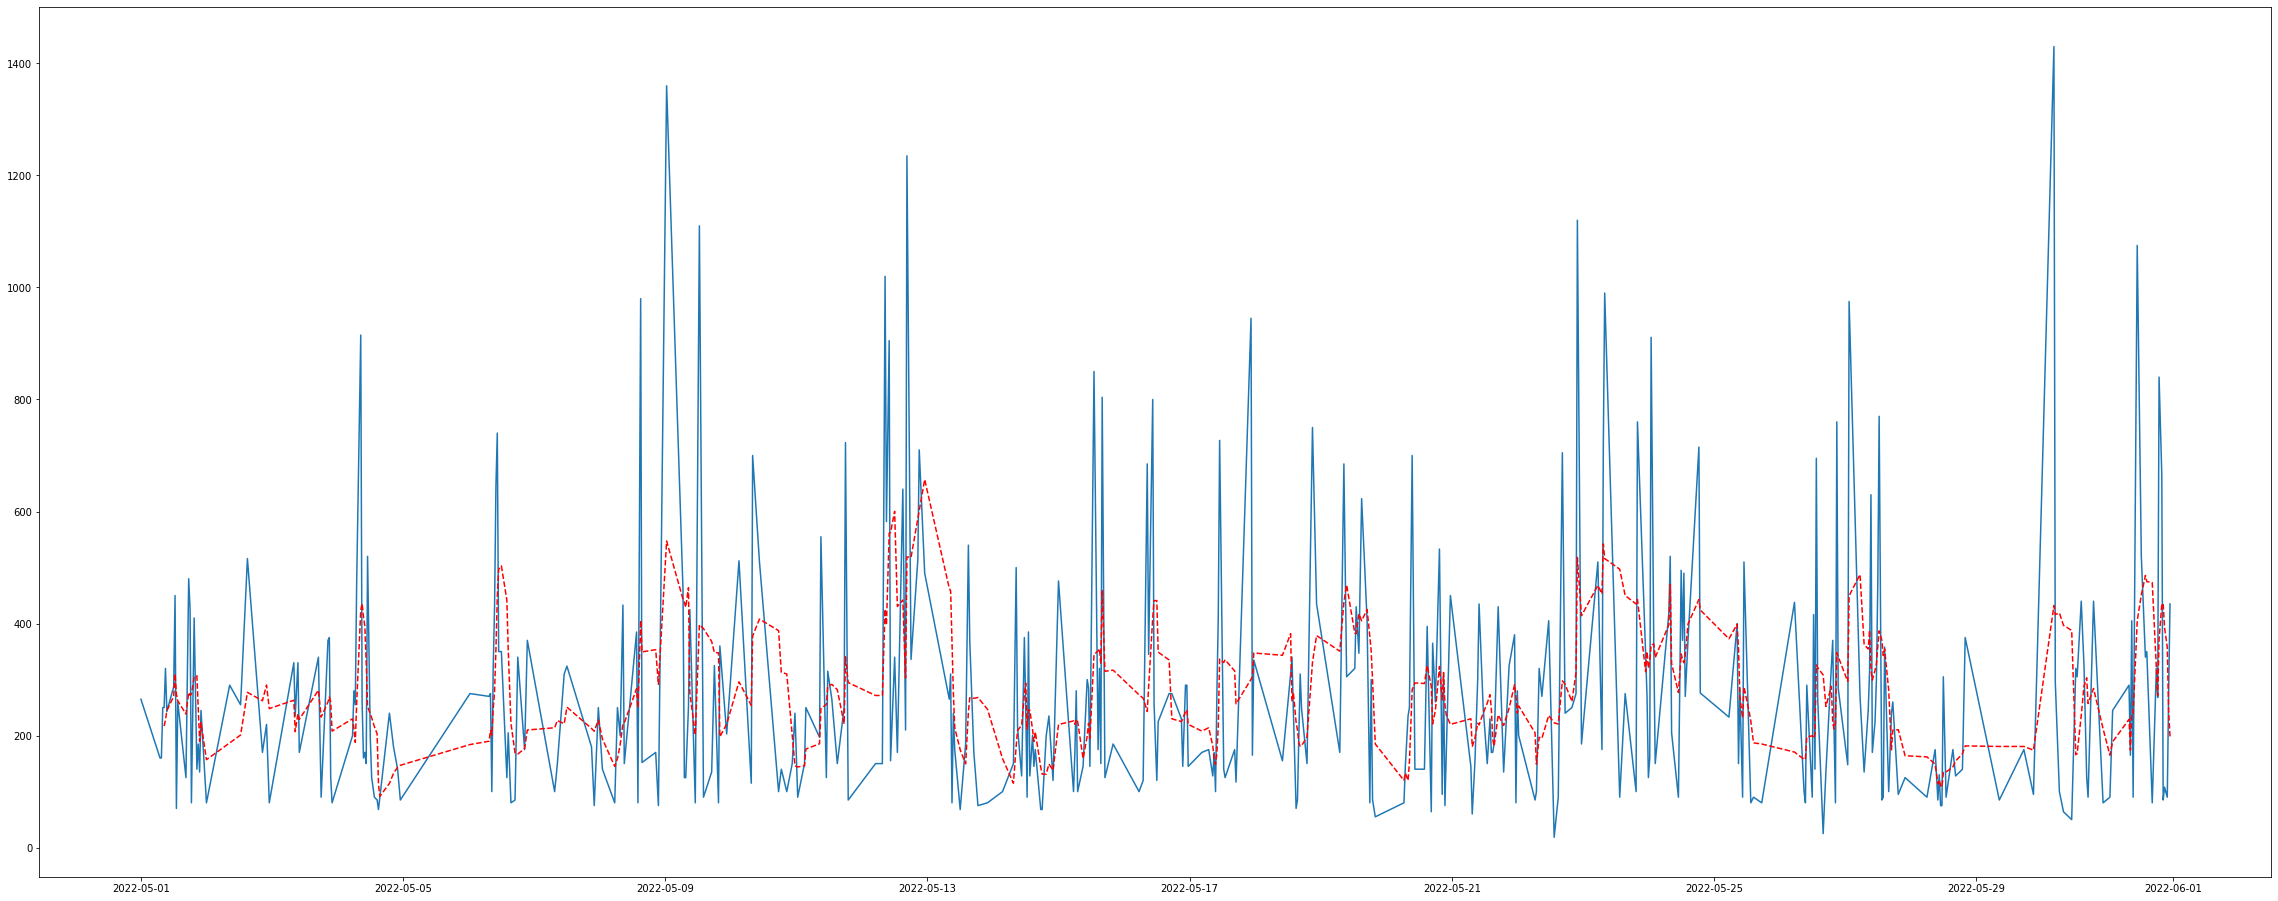

In [662]:
figure(figsize=(40, 16),)
plot(qqq["timeThirty"], 
     qqq["revenue"],
     '-',
     
     qqq["timeThirty"][5-1:], 
     calc_smooth_1(qqq["revenue"], 5),
     'r--',
    );

## Arr

In [399]:
r = requests.get("https://flights.aeroflot.ru/api/flights/v1.1/ru/board?type=onlineboard&arrival=SVO&dateFrom=2022-11-17T00:00:00&dateTo=2022-11-17T00:00:00&timeFrom=00:00:00&timeTo=23:59:59&returnTo=23:59:59",
                headers= {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36 OPR/51.0.2830.55"
    }).json()

In [543]:
svo_arrival = pd.DataFrame()

for i in r["data"]["routes"]:
    
    try:
        print(i["leg"]["status"], i["flightId"]["carrier"], 
              i["flightId"]["flightNumber"], 
              i["operatingBy"]["scheduled"])
    except:
        continue
    
    if i["leg"]["status"] != 'Arrived':
        continue
        
    qq = pd.DataFrame([
        i["flightId"]["carrier"],
        i["flightId"]["flightNumber"],
        i["leg"]["equipment"]["aircraft"]["actual"]["type"],
        i["leg"]["equipment"]["aircraft"]["actual"]["registration"],
        
        # registration
        i["leg"]["transition"]["registration"]["start"]["utc"],
        i["leg"]["transition"]["registration"]["end"]["utc"],
        
        # boarding
        i["leg"]["transition"]["boarding"]["start"]["utc"],
        i["leg"]["transition"]["boarding"]["end"]["utc"],
        
        # departure
        i["leg"]["departure"]["latest"]["airportCode"],
        i["leg"]["departure"]["times"]["actualBlockOff"]["utc"],
        i["leg"]["departure"]["times"]["scheduledDeparture"]["utc"],
        i["leg"]["departure"]["times"]["actualTakeOff"]["utc"],
        
        # arrival
        i["leg"]["arrival"].get("gate", np.NaN),
        i["leg"]["arrival"]["scheduled"]["airportCode"],
        i["leg"]["arrival"]["latest"]["airportCode"],
        i["leg"]["arrival"]["terminal"],

        i["leg"]["arrival"]["times"]["scheduledArrival"]["utc"],
        i["leg"]["arrival"]["times"]["actualTouchDown"]["utc"],
        i["leg"]["arrival"]["times"].get("deboarding", {}).get("start", {}).get("utc", np.NaN),
        i["leg"]["arrival"]["times"].get("deboarding", {}).get("stop", {}).get("utc", np.NaN),
        
        # deboarding
        i["leg"]["transition"]["deboarding"]["start"]["utc"],
        i["leg"]["transition"]["deboarding"]["end"]["utc"],
        
        # status
        i["leg"]["status"],
        i["operatingBy"]["scheduled"]
        
    ])
    
    qq = qq.T
    
    svo_arrival = pd.concat([svo_arrival, qq]).reset_index().drop(["index"], axis=1)

Arrived SU 1415 SU
Arrived SU 0427 SU
Arrived SU 1195 SU
Cancelled SU 6484 SU
Arrived SU 0031 SU
Cancelled SU 6490 SU
Arrived SU 6380 FV
Arrived SU 0047 SU
Cancelled SU 6040 SU
Arrived SU 6536 FV
Arrived SU 1327 SU
Arrived SU 1851 SU
Arrived SU 0279 SU
Arrived SU 1133 SU
Cancelled SU 6602 SU
Arrived SU 1511 SU
Arrived SU 0053 SU
Arrived SU 2139 SU
Arrived SU 1871 SU
Arrived SU 1429 SU
Arrived SU 1763 SU
Arrived SU 6174 FV
Arrived SU 1549 SU
Arrived SU 1217 SU
Arrived SU 1881 SU
Cancelled SU 6264 SU
Arrived SU 1895 SU
Arrived SU 0035 SU
Arrived SU 1835 SU
Arrived SU 1647 SU
Arrived SU 1451 SU
Cancelled SU 6468 SU
Arrived SU 0515 SU
Arrived SU 1417 SU
Arrived SU 1185 SU
Arrived SU 1335 SU
Arrived SU 1383 SU
Arrived SU 1503 SU
Arrived SU 0525 SU
Arrived SU 1289 SU
Cancelled SU 6506 SU
Arrived SU 1261 SU
Cancelled SU 6248 SU
Arrived SU 1481 SU
Arrived SU 0237 SU
Cancelled SU 6114 SU
Arrived SU 1395 SU
Arrived SU 0033 SU
Arrived SU 6408 FV
Arrived SU 1459 SU
Arrived SU 6228 FV
Arrived SU 12

In [544]:
svo_arrival.columns = ["carrier", "flight_number", 
                       "aircraft_type", "aircraft_registration",
                       "registration_start", "registration_end", 
                       "boarding_start", "boarding_end",
                       "departure_airportCode", "departure_actualBlockOff",
                       "departure_scheduledDeparture", "departure_actualTakeOff",
                       "arrival_gate", "arrival_scheduled", 
                       "arrival_latest", "arrival_terminal",
                       "arrival_scheduledArrival", "arrival_actualTouchDown", 
                       "arrival_deboardingStart", "arrival_deboardingStop",
                       "deboarding_start", "deboarding_end",
                       "status", "operatingBy"
                      ]

In [552]:
svo_arrival

,carrier,flight_number,aircraft_type,aircraft_registration,registration_start,registration_end,boarding_start,boarding_end,departure_airportCode,departure_actualBlockOff,departure_scheduledDeparture,departure_actualTakeOff,arrival_gate,arrival_scheduled,arrival_latest,arrival_terminal,arrival_scheduledArrival,arrival_actualTouchDown,arrival_deboardingStart,arrival_deboardingStop,deboarding_start,deboarding_end,status,operatingBy
0,SU,1415,73H,73121,2022-11-15T18:10:00Z,2022-11-16T17:25:00Z,2022-11-16T17:20:00Z,2022-11-16T17:40:00Z,SVX,2022-11-16T18:00:00Z,2022-11-16T18:10:00Z,2022-11-16T18:12:00Z,1,SVO,SVO,B,2022-11-16T21:05:00Z,2022-11-16T20:30:00Z,2022-11-16T20:50:00Z,NaN,2022-11-16T20:50:00Z,2022-11-16T20:59:00Z,Arrived,SU
1,SU,0427,333,73787,2022-11-15T15:10:00Z,2022-11-16T14:25:00Z,2022-11-16T14:25:00Z,2022-11-16T14:45:00Z,SSH,2022-11-16T15:05:00Z,2022-11-16T13:45:00Z,2022-11-16T15:22:00Z,138,SVO,SVO,C,2022-11-16T20:05:00Z,2022-11-16T20:59:00Z,2022-11-16T21:14:00Z,NaN,2022-11-16T21:14:00Z,2022-11-16T21:23:00Z,Arrived,SU
2,SU,1195,320,73769,2022-11-15T19:40:00Z,2022-11-16T18:55:00Z,2022-11-16T18:52:00Z,2022-11-16T19:12:00Z,KZN,2022-11-16T19:32:00Z,2022-11-16T17:35:00Z,2022-11-16T19:41:00Z,120,SVO,SVO,B,2022-11-16T19:20:00Z,2022-11-16T21:01:00Z,2022-11-16T21:12:00Z,NaN,2022-11-16T21:12:00Z,2022-11-16T21:19:00Z,Arrived,SU
3,SU,0031,320,73764,2022-11-15T19:45:00Z,2022-11-16T19:00:00Z,2022-11-16T19:01:00Z,2022-11-16T19:21:00Z,LED,2022-11-16T19:41:00Z,2022-11-16T19:45:00Z,2022-11-16T19:59:00Z,116,SVO,SVO,B,2022-11-16T21:15:00Z,2022-11-16T21:05:00Z,2022-11-16T21:17:00Z,NaN,2022-11-16T21:17:00Z,2022-11-16T21:25:00Z,Arrived,SU
4,SU,6380,SU9,89127,2022-11-15T20:45:00Z,2022-11-16T20:00:00Z,2022-11-16T20:24:00Z,2022-11-16T20:44:00Z,IJK,2022-11-16T21:04:00Z,2022-11-16T16:40:00Z,2022-11-16T21:09:00Z,NaN,SVO,SVO,B,2022-11-16T19:00:00Z,2022-11-16T22:47:00Z,NaN,NaN,2022-11-16T22:55:00Z,2022-11-16T23:25:00Z,Arrived,FV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,SU,0271,77W,VQBFK,2022-11-16T04:30:00Z,2022-11-17T03:45:00Z,2022-11-17T03:50:00Z,2022-11-17T04:10:00Z,BKK,2022-11-17T04:30:00Z,2022-11-17T04:30:00Z,2022-11-17T04:47:00Z,134,SVO,SVO,C,2022-11-17T14:40:00Z,2022-11-17T14:27:00Z,2022-11-17T14:42:00Z,NaN,2022-11-17T14:42:00Z,2022-11-17T14:48:00Z,Arrived,SU
113,SU,1135,320,73734,2022-11-16T11:10:00Z,2022-11-17T10:25:00Z,2022-11-17T10:29:00Z,2022-11-17T10:49:00Z,AER,2022-11-17T11:09:00Z,2022-11-17T11:10:00Z,2022-11-17T11:15:00Z,118,SVO,SVO,B,2022-11-17T15:00:00Z,2022-11-17T14:35:00Z,2022-11-17T14:49:00Z,NaN,2022-11-17T14:49:00Z,2022-11-17T14:55:00Z,Arrived,SU
114,SU,0017,320,73762,2022-11-16T13:15:00Z,2022-11-17T12:30:00Z,2022-11-17T12:34:00Z,2022-11-17T12:54:00Z,LED,2022-11-17T13:14:00Z,2022-11-17T13:15:00Z,2022-11-17T13:37:00Z,117,SVO,SVO,B,2022-11-17T14:45:00Z,2022-11-17T14:39:00Z,2022-11-17T14:49:00Z,NaN,2022-11-17T14:49:00Z,2022-11-17T14:57:00Z,Arrived,SU
115,SU,0321,77W,73135,2022-11-16T06:00:00Z,2022-11-17T05:15:00Z,2022-11-17T05:22:00Z,2022-11-17T05:42:00Z,MLE,2022-11-17T06:02:00Z,2022-11-17T06:00:00Z,2022-11-17T06:14:00Z,137,SVO,SVO,C,2022-11-17T15:20:00Z,2022-11-17T14:43:00Z,2022-11-17T14:58:00Z,NaN,2022-11-17T14:57:00Z,2022-11-17T15:24:00Z,Arrived,SU


## Dep

In [547]:
r = requests.get("https://flights.aeroflot.ru/api/flights/v1.1/ru/board?type=onlineboard&departure=SVO&dateFrom=2022-11-17T00:00:00&dateTo=2022-11-17T00:00:00&timeFrom=00:00:00&timeTo=23:59:59&returnTo=23:59:59",
                headers= {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36 OPR/51.0.2830.55"
    }).json()

In [548]:
r["data"]["routes"][0]

{'flyingTime': '04:25:00',
 'routeType': 'Direct',
 'operatingBy': {'scheduled': 'SU', 'operators': []},
 'pId': 'dde6fd03-e5e2-41af-85de-808a36ce4716',
 'flightId': {'carrier': 'SU',
  'flightNumber': '1524',
  'date': '2022-11-16T00:00:00'},
 'status': 'Arrived',
 'leg': {'departure': {'scheduled': {'city': 'Москва',
    'airport': 'Шереметьево',
    'countryCode': 'RU',
    'cityCode': 'MOW',
    'airportCode': 'SVO'},
   'latest': {'city': 'Москва',
    'airport': 'Шереметьево',
    'countryCode': 'RU',
    'cityCode': 'MOW',
    'airportCode': 'SVO'},
   'terminal': 'B',
   'gate': '121',
   'parkingStand': '198',
   'dispatch': 'Bus',
   'times': {'scheduledDeparture': {'utc': '2022-11-16T21:05:00Z',
     'local': '2022-11-17T00:05:00+03:00',
     'localTime': '00:05',
     'tzOffset': 180.0,
     'dayChange': {'value': 0, 'title': ''}},
    'estimatedBlockOff': {'utc': '2022-11-16T21:05:00Z',
     'local': '2022-11-17T00:05:00+03:00',
     'localTime': '00:05',
     'tzOffset': 

In [554]:
svo_departure = pd.DataFrame()

for i in r["data"]["routes"]:
    
    try:
        print(i["leg"]["status"], i["flightId"]["carrier"], 
              i["flightId"]["flightNumber"], 
              i["operatingBy"]["scheduled"])
    except:
        continue
    
    if i["leg"]["status"] != 'Arrived':
        continue
        
    qq = pd.DataFrame([
        i["flightId"]["carrier"],
        i["flightId"]["flightNumber"],
        i["leg"]["equipment"]["aircraft"]["actual"]["type"],
        i["leg"]["equipment"]["aircraft"]["actual"]["registration"],
        
        # registration
        i["leg"]["transition"]["registration"]["start"]["utc"],
        i["leg"]["transition"]["registration"]["end"]["utc"],
        
        # boarding
        i["leg"]["transition"]["boarding"]["start"]["utc"],
        i["leg"]["transition"]["boarding"]["end"]["utc"],
        
        # departure
        i["leg"]["departure"]["latest"]["airportCode"],
        i["leg"]["departure"]["times"]["actualBlockOff"]["utc"],
        i["leg"]["departure"]["times"]["scheduledDeparture"]["utc"],
        i["leg"]["departure"]["times"]["actualTakeOff"]["utc"],
        
        i["leg"]["departure"].get("gate", np.NaN),
        i["leg"]["departure"]["terminal"],
        
        # arrival
        i["leg"]["arrival"]["scheduled"]["airportCode"],
        i["leg"]["arrival"]["latest"]["airportCode"],
        i["leg"]["arrival"]["times"]["scheduledArrival"]["utc"],
        i["leg"]["arrival"]["times"].get("actualTouchDown", {}).get("utc", {}),
        i["leg"]["arrival"]["times"].get("deboarding", {}).get("start", {}).get("utc", np.NaN),
        i["leg"]["arrival"]["times"].get("deboarding", {}).get("stop", {}).get("utc", np.NaN),
        
        # deboarding
        i["leg"]["transition"]["deboarding"]["start"]["utc"],
        i["leg"]["transition"]["deboarding"]["end"]["utc"],
        
        # status
        i["leg"]["status"],
        i["operatingBy"]["scheduled"]
        
    ])
    
    qq = qq.T
    
    svo_departure = pd.concat([svo_departure, qq]).reset_index().drop(["index"], axis=1)

Arrived SU 1524 SU
Arrived SU 1874 SU
Cancelled SU 6499 SU
Cancelled SU 6467 SU
Cancelled SU 6551 SU
Arrived SU 1750 SU
Cancelled SU 6609 SU
Arrived SU 1428 SU
Arrived SU 6173 FV
Arrived SU 1964 SU
Cancelled SU 6263 SU
Arrived SU 1382 SU
Arrived SU 1306 SU
Cancelled SU 6505 SU
Arrived SU 1502 SU
Arrived SU 6531 FV
Arrived SU 0052 SU
Arrived SU 1562 SU
Arrived SU 1482 SU
Arrived SU 1512 SU
Arrived SU 6533 FV
Arrived SU 1522 SU
Cancelled SU 6253 SU
Arrived SU 1152 SU
Arrived SU 1410 SU
Arrived SU 0006 SU
Arrived SU 6171 FV
Arrived SU 6373 FV
Arrived SU 1602 SU
Arrived SU 1420 SU
Arrived SU 1122 SU
Arrived SU 1356 SU
Arrived SU 1310 SU
Arrived SU 6377 FV
Arrived SU 1444 SU
Arrived SU 1052 SU
Arrived SU 1872 SU
Arrived SU 6293 FV
Arrived SU 0278 SU
Arrived SU 1498 SU
Arrived SU 0010 SU
Cancelled SU 6557 SU
Arrived SU 1886 SU
Arrived SU 1854 SU
Arrived SU 2130 SU
Arrived SU 1136 SU
Arrived SU 0426 SU
Cancelled SU 6251 SU
Arrived SU 1276 SU
Arrived SU 1830 SU
Arrived SU 1254 SU
Arrived SU 63

In [555]:
svo_departure.columns = ["carrier", "flight_number", 
                       "aircraft_type", "aircraft_registration",
                       "registration_start", "registration_end", 
                       "boarding_start", "boarding_end",
                       "departure_airportCode", "departure_actualBlockOff",
                       "departure_scheduledDeparture", "departure_actualTakeOff",
                       "departure_gate", "departure_terminal", 
                       "arrival_scheduled_airportCode", "arrival_latest_airportCode",
                       "arrival_scheduledArrival", "arrival_actualTouchDown", 
                       "arrival_deboardingStart", "arrival_deboardingStop",
                       "deboarding_start", "deboarding_end",
                       "status", "operatingBy"
                      ]

In [556]:
svo_departure

,carrier,flight_number,aircraft_type,aircraft_registration,registration_start,registration_end,boarding_start,boarding_end,departure_airportCode,departure_actualBlockOff,departure_scheduledDeparture,departure_actualTakeOff,departure_gate,departure_terminal,arrival_scheduled_airportCode,arrival_latest_airportCode,arrival_scheduledArrival,arrival_actualTouchDown,arrival_deboardingStart,arrival_deboardingStop,deboarding_start,deboarding_end,status,operatingBy
0,SU,1524,73H,73118,2022-11-15T21:05:00Z,2022-11-16T20:20:00Z,2022-11-16T20:32:00Z,2022-11-16T20:55:00Z,SVO,2022-11-16T21:03:00Z,2022-11-16T21:05:00Z,2022-11-16T21:28:00Z,121,B,RGK,RGK,2022-11-17T01:35:00Z,2022-11-17T01:27:00Z,NaN,NaN,2022-11-17T01:28:00Z,2022-11-17T01:58:00Z,Arrived,SU
1,SU,1874,320,VPBIL,2022-11-15T21:10:00Z,2022-11-16T20:25:00Z,2022-11-16T20:40:00Z,2022-11-16T21:01:00Z,SVO,2022-11-16T21:07:00Z,2022-11-16T21:10:00Z,2022-11-16T21:22:00Z,126,C,SKD,SKD,2022-11-17T01:00:00Z,2022-11-17T01:00:00Z,2022-11-16T19:52:00Z,NaN,2022-11-17T01:05:00Z,2022-11-17T01:35:00Z,Arrived,SU
2,SU,1750,73H,73109,2022-11-15T21:25:00Z,2022-11-16T20:40:00Z,2022-11-16T20:48:00Z,2022-11-16T21:04:00Z,SVO,2022-11-16T21:23:00Z,2022-11-16T16:25:00Z,2022-11-16T21:56:00Z,105,B,YKS,YKS,2022-11-16T23:30:00Z,2022-11-17T04:21:00Z,2022-11-17T08:03:00Z,NaN,2022-11-17T04:29:00Z,2022-11-17T04:59:00Z,Arrived,SU
3,SU,1428,320,73740,2022-11-15T21:40:00Z,2022-11-16T20:55:00Z,2022-11-16T21:03:00Z,2022-11-16T21:22:00Z,SVO,2022-11-16T21:32:00Z,2022-11-16T21:40:00Z,2022-11-16T22:00:00Z,107,B,MQF,MQF,2022-11-17T00:05:00Z,2022-11-16T23:51:00Z,NaN,NaN,2022-11-16T23:57:00Z,2022-11-17T00:27:00Z,Arrived,SU
4,SU,6173,SU9,89028,2022-11-15T21:40:00Z,2022-11-16T20:55:00Z,2022-11-16T20:58:00Z,2022-11-16T21:18:00Z,SVO,2022-11-16T21:38:00Z,2022-11-16T21:40:00Z,2022-11-16T22:05:00Z,NaN,B,REN,REN,2022-11-17T00:05:00Z,2022-11-16T23:40:00Z,NaN,NaN,2022-11-16T23:47:00Z,2022-11-17T00:17:00Z,Arrived,FV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,SU,0022,320,73774,2022-11-16T13:05:00Z,2022-11-17T12:20:00Z,2022-11-17T12:27:00Z,2022-11-17T12:55:00Z,SVO,2022-11-17T13:00:00Z,2022-11-17T13:05:00Z,2022-11-17T13:21:00Z,119,B,LED,LED,2022-11-17T14:35:00Z,2022-11-17T14:20:00Z,NaN,NaN,2022-11-17T14:24:00Z,2022-11-17T14:54:00Z,Arrived,SU
110,SU,0024,321,73705,2022-11-16T14:20:00Z,2022-11-17T13:35:00Z,2022-11-17T13:43:00Z,2022-11-17T14:09:00Z,SVO,2022-11-17T14:15:00Z,2022-11-17T14:20:00Z,2022-11-17T14:44:00Z,118,B,LED,LED,2022-11-17T15:55:00Z,2022-11-17T15:46:00Z,NaN,NaN,2022-11-17T15:51:00Z,2022-11-17T16:21:00Z,Arrived,SU
111,SU,1006,320,73754,2022-11-16T14:20:00Z,2022-11-17T13:35:00Z,2022-11-17T13:42:00Z,2022-11-17T14:10:00Z,SVO,2022-11-17T14:17:00Z,2022-11-17T14:20:00Z,2022-11-17T14:31:00Z,117,B,KGD,KGD,2022-11-17T17:10:00Z,2022-11-17T16:39:00Z,NaN,NaN,2022-11-17T16:45:00Z,2022-11-17T17:15:00Z,Arrived,SU
112,SU,1214,73H,73109,2022-11-16T14:45:00Z,2022-11-17T14:00:00Z,2022-11-17T14:05:00Z,2022-11-17T14:30:00Z,SVO,2022-11-17T14:37:00Z,2022-11-17T14:45:00Z,2022-11-17T14:52:00Z,110,B,KUF,KUF,2022-11-17T16:35:00Z,2022-11-17T16:11:00Z,2022-11-17T13:07:00Z,NaN,2022-11-17T16:17:00Z,2022-11-17T16:47:00Z,Arrived,SU


In [558]:
svo_departure.aircraft_type.value_counts()

320    53
SU9    28
73H    20
321     9
333     3
77W     1
Name: aircraft_type, dtype: int64

In [643]:
svo_departure.arrival_scheduled_airportCode.value_counts()

LED    11
AER     8
KZN     5
SVX     4
KUF     4
EVN     3
TJM     3
KGD     3
REN     3
MRV     3
IST     3
MMK     3
UFA     3
ASF     3
STW     2
MCX     2
GYD     2
GOJ     2
PEE     2
MSQ     2
NBC     2
ARH     2
VOG     2
GSV     2
CEK     2
KJA     2
IKT     2
ALA     2
OVB     2
MQF     2
CAI     1
ULV     1
PEZ     1
OSW     1
AYT     1
HRG     1
NQZ     1
RGK     1
HKT     1
SCW     1
DXB     1
SSH     1
FRU     1
GRV     1
SKD     1
TAS     1
IJK     1
NUX     1
KGF     1
SGC     1
HMA     1
YKS     1
AKX     1
Name: arrival_scheduled_airportCode, dtype: int64